#### Convolutional Neural Network

#### Zadanie polega na utworzenu sieci konwolucyjnej pozwalającej na rozpoznawanie ubrań na podstawie zbioru MNIST Fashion.

Proszę wyświetlić wizualizację kilku filtrów konwolucyjnych (co sieć "widzi") - polega to na przepuszczeniu przez sieć próbki (przejście w przód), pobranie wartości aktywacji wybranej warstwy i filtra, a następnie wyświetleniu poprzez imshow.

Dodatkowo, proszę zastosować warstwę Softmax i dla kilku przykładów wyświetlić wykres słupkowy (barplot) z wyznaczonymi prawdopodobieństwami, wartością przewidzianą oraz wartością prawdziwą - na wykresie proszę zawrzeć również sprawdzany obraz (trochę zabawy z matplotlibem).

Projekt powinien obejmować trenowanie oraz testowanie sieci.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.datasets import fashion_mnist
from keras.utils import load_img, img_to_array
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, add, Dense, Dropout, Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

In [2]:
print(tf.__version__)

2.9.1


In [3]:
fashionMnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.30)

In [4]:
classNames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###### 0 T-shirt/top
###### 1 Trouser
###### 2 Pullover
###### 3 Dress
###### 4 Coat
###### 5 Sandal
###### 6 Shirt
###### 7 Sneaker
###### 8 Bag
###### 9 Ankle boot

In [5]:
train_images.shape #60000 obrazów treningowych 28x28

(60000, 28, 28)

In [6]:
test_images.shape  #10000 obrazów testowych 28x28

(10000, 28, 28)

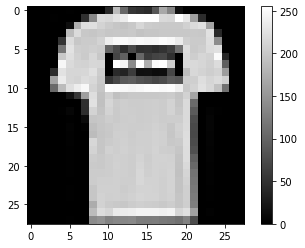

In [7]:
plt.figure()
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

In [8]:
trainLabelsCat = to_categorical(train_labels)
testLabelsCat = to_categorical(test_labels)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(layers.Conv2D(filters = 192, kernel_size = (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2))) #, padding='same'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(ZeroPadding2D((1,1)))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

EarlyStop = EarlyStopping(monitor='loss', 
                          patience=5,
                          verbose=1)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, trainLabelsCat, epochs=15, batch_size=32, callbacks = [EarlyStop])
test_loss, test_acc = model.evaluate(test_images, testLabelsCat)

Epoch 1/15
1875/1875 [==============================] - 121s 64ms/step - loss: 0.6727 - accuracy: 0.8132
Epoch 2/15
1875/1875 [==============================] - 119s 64ms/step - loss: 0.4301 - accuracy: 0.8548
Epoch 3/15
1875/1875 [==============================] - 130s 69ms/step - loss: 0.4478 - accuracy: 0.8507
Epoch 4/15
1875/1875 [==============================] - 122s 65ms/step - loss: 0.4776 - accuracy: 0.8460
Epoch 5/15
1875/1875 [==============================] - 118s 63ms/step - loss: 0.4992 - accuracy: 0.8406
Epoch 6/15
1875/1875 [==============================] - 119s 63ms/step - loss: 0.5214 - accuracy: 0.8317
Epoch 7/15
1875/1875 [==============================] - 120s 64ms/step - loss: 0.5541 - accuracy: 0.8243
Epoch 7: early stopping
313/313 [==============================] - 6s 18ms/step - loss: 0.4822 - accuracy: 0.8347


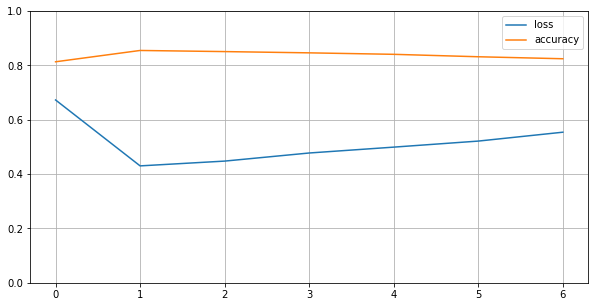

In [10]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 192)       1920      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 192)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       442624    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               8

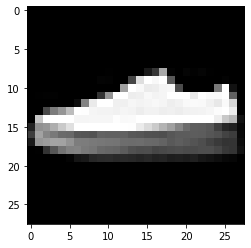

In [12]:
plt.imshow(X_test[32], cmap=plt.get_cmap('gray'))

1/1 [==============================] - 0s 85ms/step


<BarContainer object of 10 artists>

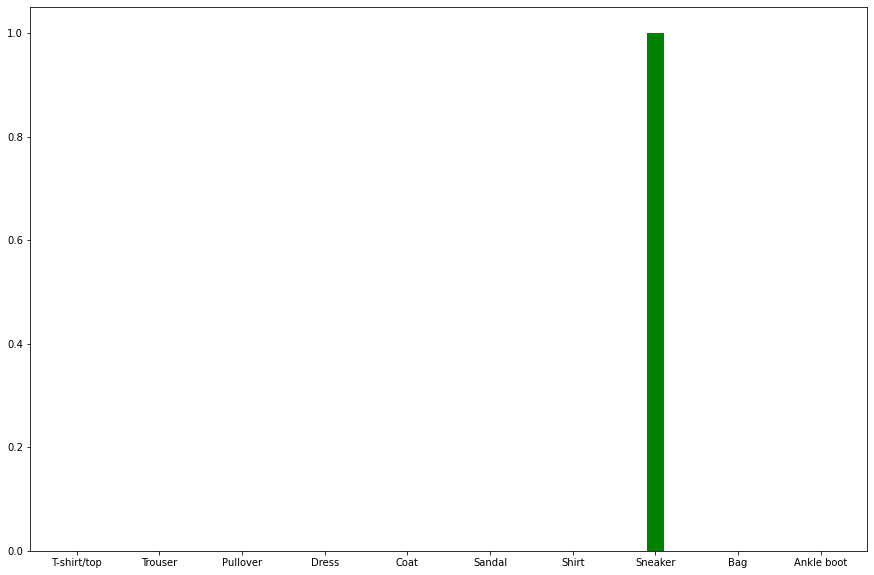

In [13]:
model_predictions = model.predict(X_test[32].reshape((1,28,28,1)))
plt.figure(figsize=(15,10))
plt.bar(classNames,model_predictions[0], width=0.2,align='center', color='g')

In [14]:
print(train_images.shape)
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape, test_images.shape)
#train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32')/255
#test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32')/255
print(train_images.shape, test_images.shape)

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)
print(train_labels_cat, test_labels_cat)

(60000, 28, 28)
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
N = 16
predictions = model.predict(train_images)
pred = np.argmax(predictions, axis = 1)[:N] 
label = np.argmax(train_labels_cat, axis = 1)[:N] 
print(pred, label)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img) : 
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

num_rows = 4
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], train_labels, train_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], train_labels)
plt.tight_layout()
plt.show()


fig = plt.figure(figsize = (20, 10))
ind = np.arange(N)
width = 0.3
ax = fig.add_axes([0,0,1,1])
plt.bar(ind, pred, width, color = 'b')
plt.bar(ind + width, label, width, color = 'g')
#ax.set_ylabel('Values')
ax.set_yticks(np.arange(0, 10, 1))
ax.set_title('Predicted values compared to true values')
#sns.barplot(x = "predicted", y = "true_value", data = {'predicted': prediction[0], 'true_value': X_train})
plt.legend(['pred', 'labels'], loc='best')
plt.ylabel('Value from dataset')
#plt.xlabel('Count of Samples/Observations');
plt.show()

 571/1875 [========>.....................] - ETA: 25s

train_images = train_images / 255.0
test_images = test_images / 255.0

N = 16
predictions = model.predict(train_images)
pred = np.argmax(predictions, axis = 1)[:N] 
label = np.argmax(train_labels_cat, axis = 1)[:N] 
print(pred, label)

def plot_image(i, predictions_array, true_label, img) : 
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], train_labels, train_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], train_labels)
plt.tight_layout()
plt.show()## Wizualizacja tego co widzi sieć

In [ ]:
layers = model.layers
print(layers)

filters, biases = model.layers[0].get_weights()
print(model.layers[1].output.name, filters.shape)

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    

model_outputs = [model.layers[0].output, model.layers[1].output]
model_short = Model(inputs=model.inputs, outputs=model_outputs)
print(model_short.summary())

In [ ]:
feature_output = model_short.predict(train_images[85:420])

columns = 10
rows = 10

for ftr in feature_output:
    fig=plt.figure(figsize=(10, 10))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
    plt.show()